线性回归分析概述: 任务分析 
1.准备工作 
    1.1工具包
    1.2数据读取 
2.数据探索 
    2.1数据简析 数据规模shape；数据信息info()与数据类别（进一步编码）和考虑拆分数值型和字符型特征；数据浏览head(),空值总数目isnull().values.sun()与特征空值数目空值总数目isnull().sun()；数据统计分析describe()
    2.2 目标值y分析，直方图与散点图，skew()对称度，考虑对数处理等 
    2.3 数值型特征相关性分析 corr(),heatmap(),考虑需丢掉的相似特征
    2.4 X特征分析，散点图，考虑离群点处理
3.特征工程 
    3.1丢弃特征 
    3.2离群点处理
    3.3拆分特征和空值处理 
    3.4确定训练数据与测试数据 
    3.5确定X与y 
    3.7目标值y修正 
    3.6特征编码 
    3.8 数据标准化 归一化 规范化 
4.模型训练（多种） 
    4.1 线性模型 
       4.1.1模型搭建 
       4.1.2 训练数据与测试数据训练形式CV 
       4.1.3 模型训练 
       4.1.4结果评估 最佳参数 均方误差可视化 残差分布直方图 散点图 真值与测试值分布等     4.2 Ridge模型 岭回归 
    4.3 Lasso回归 
    5.模型评估与选择

任务分析：利用线性回归技术实现Ames 房价预测 Ames 房价预测是Kaggle 平台上的一个竞赛任务，需要根据房屋 的特征来预测亚美尼亚州洛瓦市（Ames，Lowa）的房价。其中房屋的特征x 共 有79 维，响应值y 为每个房屋的销售价格（SalePrice）。评价标准为预测值的 对数和观测值的对数的RMSE(Root-Mean-Squared-Error )。

1.准备工作 

1.1工具包

In [1]:
#工具包
import pandas as pd #数据分析
import numpy as np  #数据处理

import matplotlib.pyplot as plt  #可视化
import seaborn as sns #可视化

%matplotlib inline  #嵌入到里面

1.2导入数据

In [3]:
#读数据
train =  pd.read_csv("train.csv")
test =  pd.read_csv("test.csv")

2.数据探索 

2.1数据简析

In [4]:
#数据规模
train.shape

(1460, 81)

In [5]:
#数据信息  数据有object int float 和空值  需分离出字符串型和拆分特征   需进一步编码
train.info()    # 查看数据信息
print('......................')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
#数据浏览
train.head()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
#空值分析
print('train空值总数目：',train.isnull().values.sum())
print('test空值总数目：',test.isnull().values.sum())
train.isnull().sum()
print('......................')
test.isnull().sum()

train空值总数目： 6965
test空值总数目： 7000
......................


Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [8]:
#数据统计分析   数值型
train.describe()
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


2.2目标y分析

1.8828757597682129

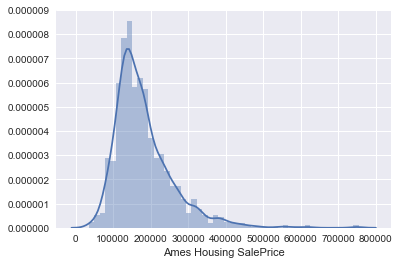

In [9]:
#目标y分析SalePrice 直方图 左倾  有一部分价格较高的房屋  考虑取对数   右偏
plt.figure()
sns.distplot(train.SalePrice,bins = 50,kde = True)
plt.xlabel('Ames Housing SalePrice')
train.SalePrice.skew()
#sns.distplot(np.log(data_train.SalePrice),bins = 40,kde = True)

0.12133506220520406

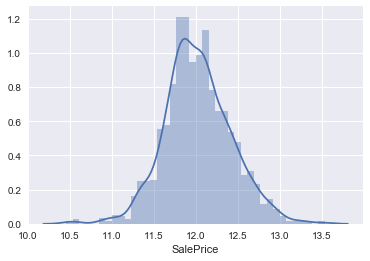

In [10]:
#取对数分析  近正态
log_SalePrice = np.log(train.SalePrice)
sns.distplot(log_SalePrice,bins = 40,kde = True)
log_SalePrice.skew()

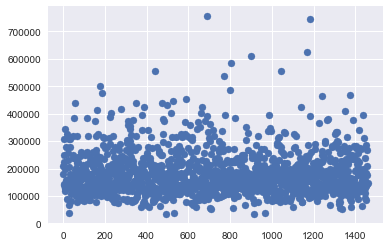

In [11]:
#目标y分析SalePrice 散点图   考虑去掉价格较高的样本 400000
plt.scatter(range(train.shape[0]),train.SalePrice.values)

2.3特征相关性分析

In [12]:
#数值型特征相关
data_corr = train.corr().abs()
#特征较多 取与y相关的特征 排序观察
data_corr.SalePrice.sort_values(ascending = False)[:12]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
Name: SalePrice, dtype: float64

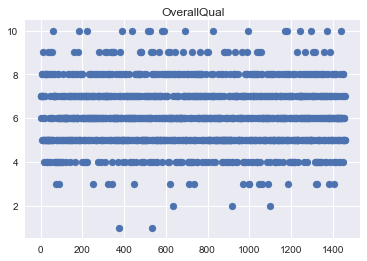

In [13]:
#对与y相关性高的前六的X特征分析  考虑离群点
#X特征散点图   
plt.scatter(range(train.shape[0]),train.OverallQual.values)
plt.title('OverallQual')

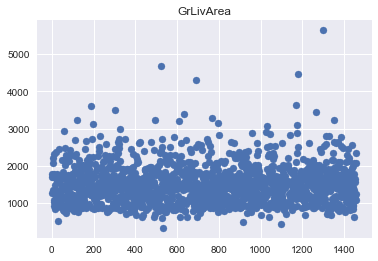

In [14]:
#X特征散点图  丢掉大于4000
plt.scatter(range(train.shape[0]),train.GrLivArea.values)
plt.title('GrLivArea')

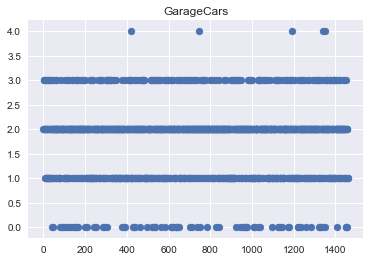

In [15]:
#X特征散点图  
plt.scatter(range(train.shape[0]),train.GarageCars.values)
plt.title('GarageCars')

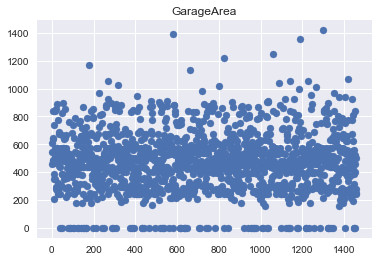

In [16]:
#X特征散点图  丢掉大于1000
plt.scatter(range(train.shape[0]),train.GarageArea.values)
plt.title('GarageArea')

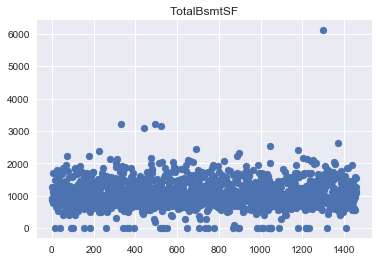

In [17]:
#X特征散点图  丢掉大于2200
plt.scatter(range(train.shape[0]),train.TotalBsmtSF.values)
plt.title('TotalBsmtSF')

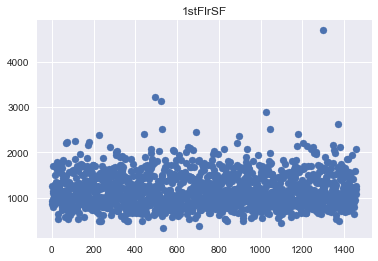

In [18]:
#X特征散点图  丢掉大于3000
plt.scatter(range(train.shape[0]),train['1stFlrSF'].values)
plt.title('1stFlrSF')

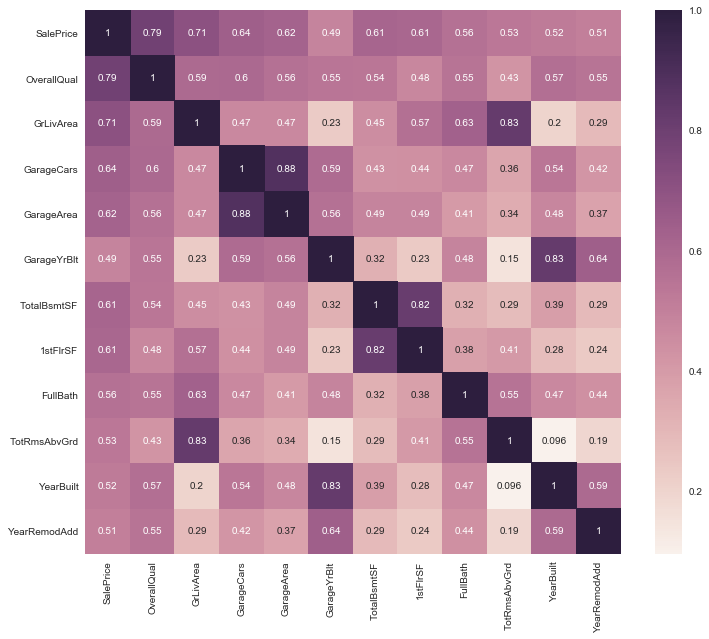

In [19]:
#查看超过0.5的相关属性的热点图
corr=train[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

plt.subplots(figsize = (12,10))
sns.heatmap(corr,annot = True)#标记数值
sns.heatmap(corr, mask=corr < 1, cbar=False)
plt.savefig('Amse_house_coor.png')

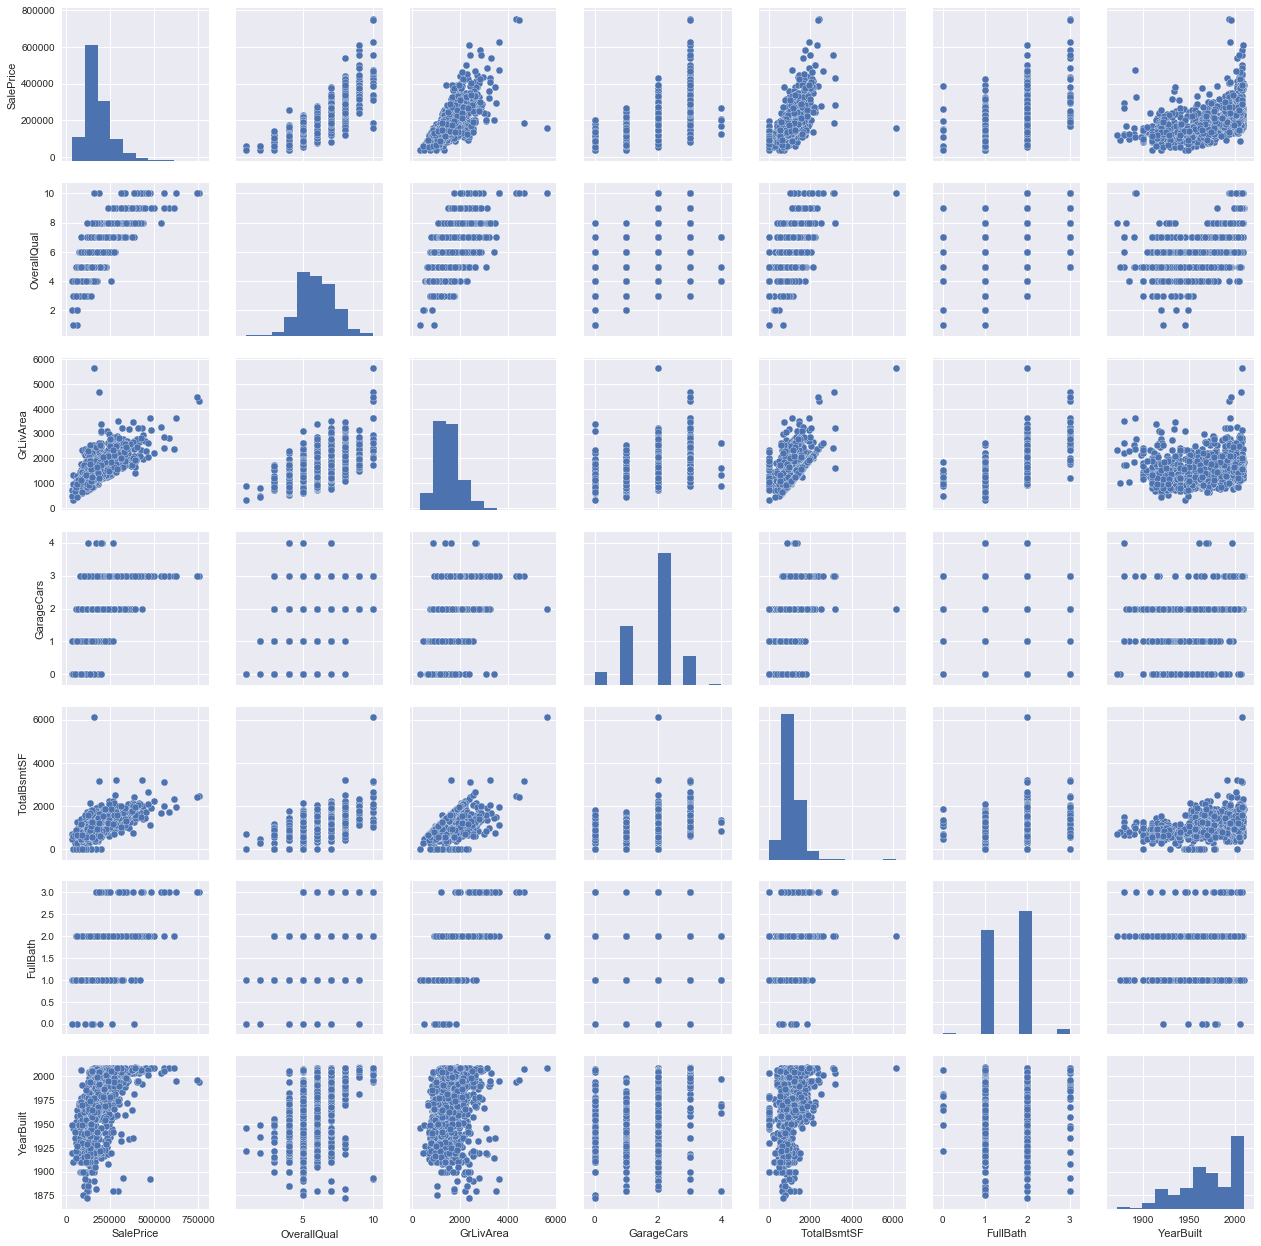

In [20]:
# 查看几个相关性最强的分布图
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [21]:
#X特征相关   排序观察    这段代码有问题？？
#取特征名称
cols=train.columns 
#相关系数阈值
threshold = 0.5
# 系数存储
corr_list = []
#特征行数
size = data_corr.shape[0]

#查找系数
for i in range(0, size): #特征范围
    for j in range(i+1,size): #防止重复
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#排序          
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#打印
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))
#这一步需不需要确定从相关性高的特征对中取其一？

MasVnrArea and ExterQual = 0.88
Alley and MasVnrType = 0.83
HouseStyle and Exterior1st = 0.83
Neighborhood and Condition1 = 0.82
LotArea and BsmtUnfSF = 0.79
HouseStyle and BsmtUnfSF = 0.71
Condition2 and HouseStyle = 0.69
RoofStyle and Exterior1st = 0.68
Utilities and OverallQual = 0.65
LotShape and MasVnrType = 0.64
MasVnrArea and BsmtUnfSF = 0.64
HouseStyle and YearBuilt = 0.63
ExterQual and BsmtUnfSF = 0.62
Condition2 and Exterior1st = 0.62
Neighborhood and BsmtUnfSF = 0.61
Condition2 and YearRemodAdd = 0.61
Condition1 and BsmtUnfSF = 0.61
LotArea and MasVnrArea = 0.60
LotArea and HouseStyle = 0.59
Alley and LotShape = 0.59
MasVnrType and MasVnrArea = 0.59
LotArea and Alley = 0.57
Condition1 and HouseStyle = 0.57
MasVnrType and ExterQual = 0.56
LotArea and ExterQual = 0.56
YearBuilt and BsmtUnfSF = 0.56
YearBuilt and Exterior1st = 0.55
LotArea and LotShape = 0.55
LotArea and YearBuilt = 0.55
LotArea and MasVnrType = 0.55
Alley and MasVnrArea = 0.54
LotArea and Neighborhood = 0.54
E

3.特征工程 3.1丢特征

In [22]:
#丢掉相关性大于0.8四对特征 只取其一   和Id
train = train.drop(['GarageCars','YearBuilt','TotRmsAbvGrd','1stFlrSF','Id'],1)
test = test.drop(['GarageCars','YearBuilt','TotRmsAbvGrd','1stFlrSF','Id'],1)

3.2离群点处理

In [23]:
#离群点处理
train = train.drop(train[(train['GrLivArea']>4000) | (train['GarageArea']>1200)|(train['TotalBsmtSF']>2200)|(train['SalePrice']>400000)].index)


3.3空值处理

In [24]:
# 查看缺失值的数量
total = train.isnull().sum().sort_values(ascending=False)
total.head(20)

PoolQC          1416
MiscFeature     1368
Alley           1330
Fence           1143
FireplaceQu      689
LotFrontage      256
GarageType        81
GarageCond        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
BsmtFinType2      37
MasVnrArea         7
MasVnrType         7
Electrical         1
Neighborhood       0
dtype: int64

In [25]:
#丢掉空值前5的特征
train = train.drop(['MiscFeature','Alley','Fence','PoolQC','FireplaceQu'],axis = 1)
test = test.drop(['MiscFeature','Alley','Fence','PoolQC','FireplaceQu'],axis = 1)

In [26]:
#对缺失值进行填补
train = train.fillna(train.mean())
test = test.fillna(test.mean())

3.4特征编码  哑编码

In [27]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


3.5 分离X与y

In [28]:
y = train['SalePrice'].values
#对于取log
y_log = np.log(train['SalePrice'])
X = train.drop("SalePrice",1)

3.6划分测试集与训练集

In [29]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33, test_size = 0.2)
#X_train, X_test, y_train, y_test = train_test_split(X, y_log, random_state = 32, test_size = 0.2)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


3.7数据标准化

In [30]:
from sklearn.preprocessing import StandardScaler
#分别初始化对特征和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()
#分别对训练和测试数据数据的特征以及目标值进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


4.模型训练

4.1最小二乘

In [31]:
#线性回归
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#实例
lr = LinearRegression()
#训练
lr.fit(X_train,y_train)
#预测
y_test_pre_lr = lr.predict(X_test)
y_train_pre_lr = lr.predict(X_train)
#评估
print('the r2 score of ridge on test is:',r2_score(y_test,y_test_pre_lr))
print('the r2 score of ridge on train is:',r2_score(y_train,y_train_pre_lr))

the r2 score of ridge on test is: -6.24081925621603e+24
the r2 score of ridge on train is: 0.9390422013087382


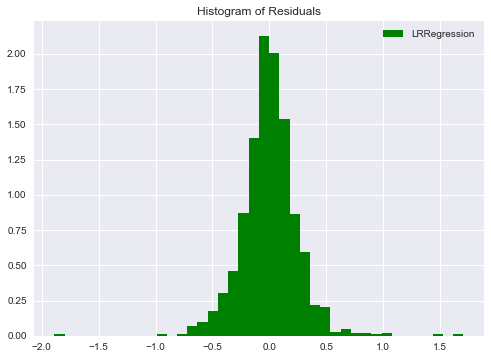

In [32]:
#残差直方图  
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(y_train - y_train_pre_lr, bins = 40, label = 'LRRegression', color = "g", normed = True)
ax.set_title("Histogram of Residuals")
ax.legend(loc = 'best')

4.2岭回归

In [33]:
#岭回归
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
#正则参数
alphas = [ 0.01, 0.1, 1, 10,100,1000]
#实例
ridge = RidgeCV(alphas = alphas,store_cv_values=True)
#训练
ridge.fit(X_train,y_train)
#预测
y_test_pre_ridge = ridge.predict(X_test)
y_train_pre_ridge = ridge.predict(X_train)
#评估
print('the r2 score of ridge on test is:',r2_score(y_test,y_test_pre_ridge))
print('the r2 score of ridge on train is:',r2_score(y_train,y_train_pre_ridge))

the r2 score of ridge on test is: 0.9144970982235183
the r2 score of ridge on train is: 0.935840527176415


alphas is: 100.0


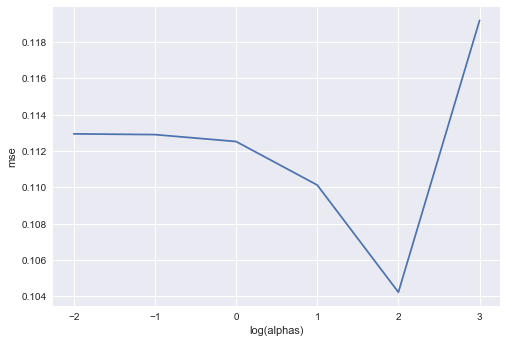

In [34]:
#可视化 mse均方误差
mse_mean = np.mean(ridge.cv_values_,axis = 0)
plt.figure()
plt.plot(np.log10(alphas),mse_mean.reshape(len(alphas),1))
plt.xlabel('log(alphas)')
plt.ylabel('mse')
#最优参数
print('alphas is:',ridge.alpha_)

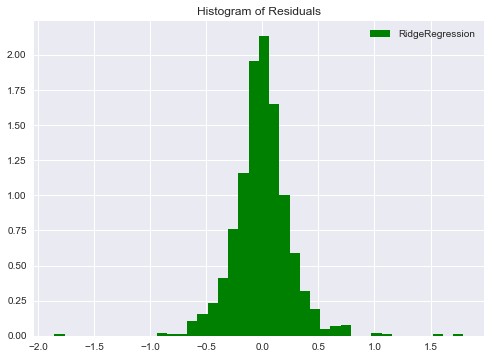

In [35]:
#残差直方图
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(y_train - y_train_pre_ridge, bins = 40, label = 'RidgeRegression', color = "g", normed = True)
ax.set_title("Histogram of Residuals")
ax.legend(loc = 'best')

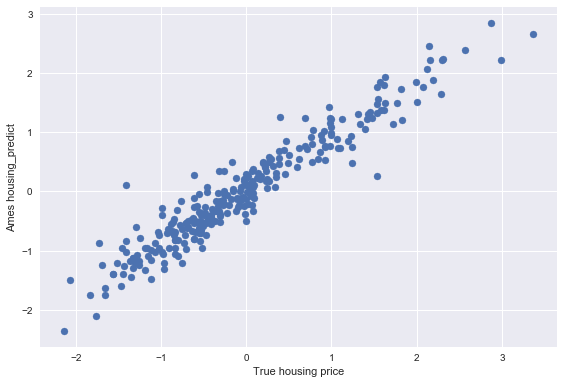

In [36]:
#观察预测值与真值的散点图
#plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_test_pre_ridge)
#plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True housing price')
plt.ylabel('Ames housing_predict')
plt.tight_layout()

4.3 Lasso模型

In [37]:
from sklearn.linear_model import LassoCV
#生成实例  设置参数范围
lasso = LassoCV(alphas =[0.0001,0.001,0.01, 0.1, 1,])  
#训练（内含CV）eps=0.0001, n_alphas=100000
lasso.fit(X_train, y_train)  
#测试
y_test_pred_lasso = lasso.predict(X_test)
y_train_pred_lasso = lasso.predict(X_train)
# 评估，使用r2_score评价模型在测试集和训练集上的性能
print ('The r2 score of LassoCV on test is', r2_score(y_test, y_test_pred_lasso))
print ('The r2 score of LassoCV on train is', r2_score(y_train, y_train_pred_lasso))

The r2 score of LassoCV on test is 0.9110368167731275
The r2 score of LassoCV on train is 0.9264956792123208


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alphas is: 0.01


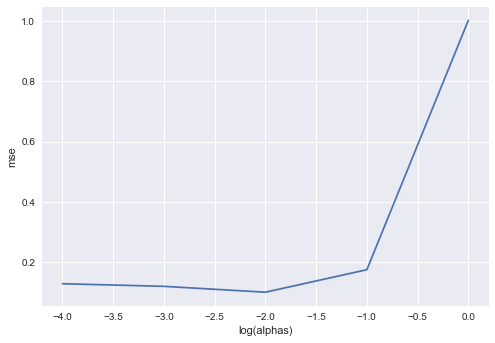

In [38]:
#可视化 mse均方误差
mse = np.mean(lasso.mse_path_,axis = 1)
plt.plot(np.log10(lasso.alphas_),mse)
plt.xlabel('log(alphas)')
plt.ylabel('mse')
print('alphas is:',lasso.alpha_)

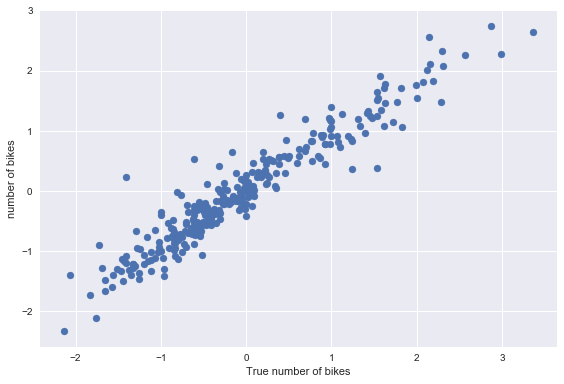

In [39]:
#观察预测值与真值的散点图
#plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_test_pred_lasso)
#plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True number of bikes')
plt.ylabel('number of bikes')
plt.tight_layout()

5.模型评估与选择

In [40]:
#选取岭回归模型